In [15]:
import pandas as pd
df=pd.read_csv('Data/Consumer_Complaints.csv')

In [16]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/26/2018,"Credit reporting, credit repair services, or o...",Credit repair services,Problem with customer service,NaN,NaN,Company has responded to the consumer and the ...,CORELOGIC INC,NY,114XX,NaN,NaN,Web,12/26/2018,Closed with explanation,Yes,NaN,3110094
1,12/26/2018,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"Collection Bureau of the Hudson Valley, Inc.",NaN,NaN,NaN,NaN,Referral,12/26/2018,Closed with explanation,Yes,NaN,3109974
2,12/26/2018,Debt collection,Auto debt,Communication tactics,Frequent or repeated calls,NaN,NaN,"TIDEWATER FINANCE COMPANY, INC.",VA,236XX,NaN,NaN,Web,12/26/2018,In progress,Yes,NaN,3109964
3,12/26/2018,Checking or savings account,Checking account,Problem caused by your funds being low,Bounced checks or returned payments,NaN,NaN,NAVY FEDERAL CREDIT UNION,DE,197XX,Servicemember,NaN,Web,12/26/2018,In progress,Yes,NaN,3109030
4,12/26/2018,Mortgage,Other type of mortgage,Struggling to pay mortgage,NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",GA,30107,NaN,NaN,Referral,12/26/2018,In progress,Yes,NaN,3109807


In [17]:
df=df[pd.notnull(df['Consumer complaint narrative'])]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353150 entries, 93 to 817048
Data columns (total 18 columns):
Date received                   353150 non-null object
Product                         353150 non-null object
Sub-product                     300977 non-null object
Issue                           353150 non-null object
Sub-issue                       243700 non-null object
Consumer complaint narrative    353150 non-null object
Company public response         170538 non-null object
Company                         353150 non-null object
State                           351833 non-null object
ZIP code                        275133 non-null object
Tags                            60991 non-null object
Consumer consent provided?      353150 non-null object
Submitted via                   353150 non-null object
Date sent to company            353150 non-null object
Company response to consumer    353146 non-null object
Timely response?                353150 non-null object
Consumer 

In [19]:
col=['Product', 'Consumer complaint narrative']
df=df[col]

In [20]:
df.columns

Index([u'Product', u'Consumer complaint narrative'], dtype='object')

In [21]:
df.columns=['Product','Consumer_complaint_narrative']

In [22]:
df['category_id']=df['Product'].factorize()[0]
from io import StringIO
category_id_df=df[['Product','category_id']].drop_duplicates().sort_values('category_id')
category_to_id=dict(category_id_df.values)
id_to_category=dict(category_id_df[['category_id','Product']].values)

In [23]:
df.head()

,Product,Consumer_complaint_narrative,category_id
93,Debt collection,I am beyond exhausted with all my efforts to r...,0
101,"Credit reporting, credit repair services, or o...",All dates on accounts are almost showing prese...,1
115,Debt collection,In XX/XX/XXXX LJ Ross Associates began contact...,0
139,"Credit reporting, credit repair services, or o...",I would like to request a security freeze plac...,1
151,"Payday loan, title loan, or personal loan",I contacted this company on XX/XX/2018 to find...,2


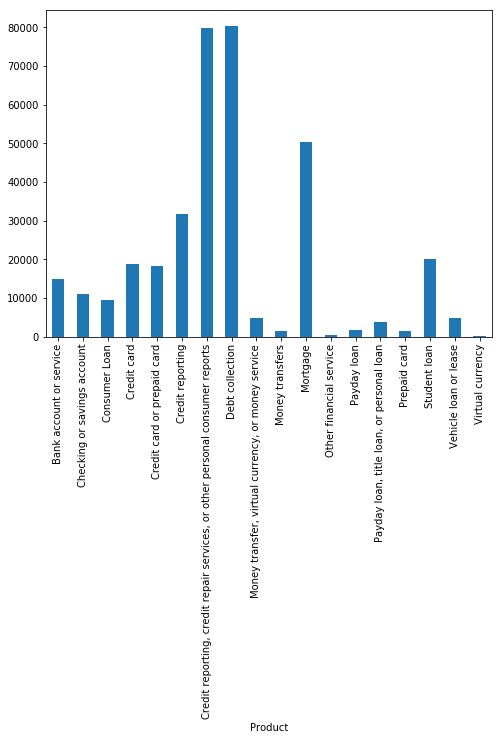

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test=train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state=0)
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(X_train)
tfidf_transformer=TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
clf=MultinomialNB().fit(X_train_tfidf, y_train)

/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [28]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [29]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [30]:
df[df['Consumer_complaint_narrative']=="This company refuses to provide me verification and validation of debt per my right under the EDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
